In [2]:
import pandas as pd

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('csv/midterm_dataset/melb_data.csv')

In [5]:
numerical_features = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']
df_numerical = df[numerical_features]

In [6]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numerical), columns=df_numerical.columns)

In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

In [8]:
inertias = []
K = range(1, 11)

In [9]:
for k in K:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

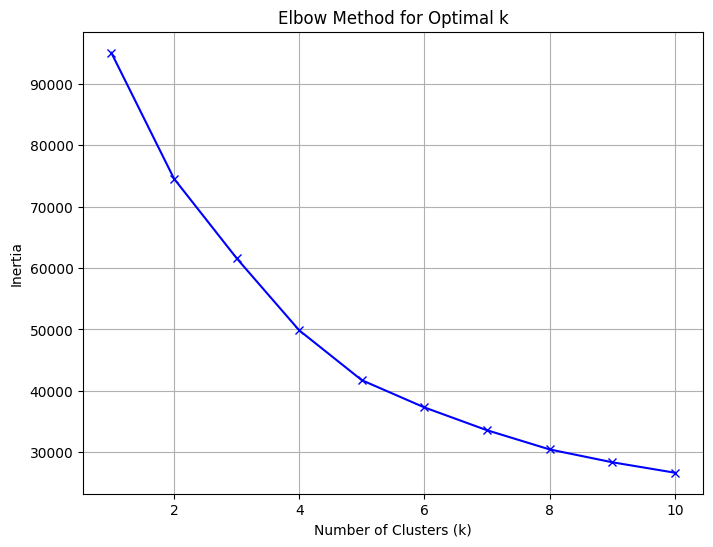

In [10]:
plt.figure(figsize=(8,6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [11]:
optimal_k = 4
model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = model.fit_predict(df_scaled)


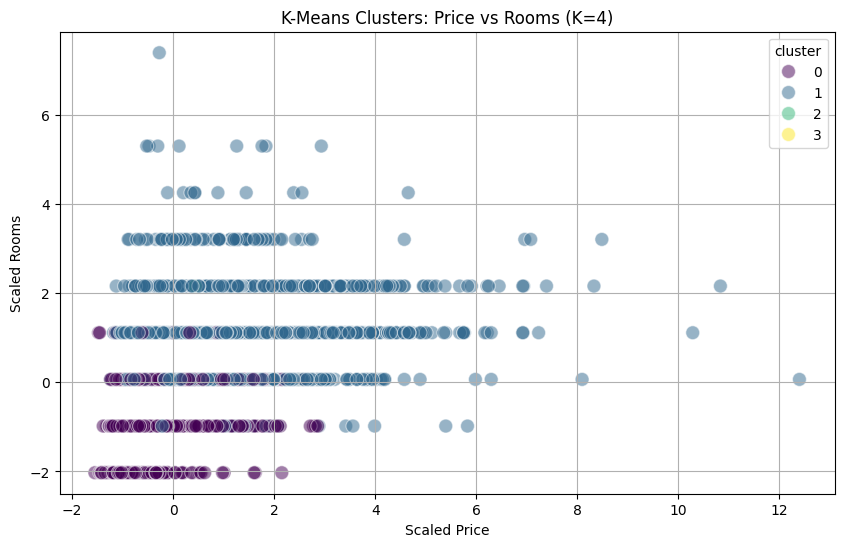

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df_scaled['Price'], y=df_scaled['Rooms'], hue='cluster', palette='viridis', s=100, alpha=0.5)
plt.title(f'K-Means Clusters: Price vs Rooms (K={optimal_k})')
plt.xlabel('Scaled Price')
plt.ylabel('Scaled Rooms')
plt.grid(True)
plt.show()

In [13]:
print("\nCluster Sizes:")
print(df['cluster'].value_counts())


Cluster Sizes:
cluster
0    7909
1    5669
3       1
2       1
Name: count, dtype: int64
